# Complex Models

Now we want to find our final model by combining those parameters which gave us good results.

## Table of Contents
1. [Gather Data](#data) <br>
    1. [Image Size 128x128](#128) <br>
    2. [Image Size 256x256](#256) <br>
    3. [Zoomed Images](#zoom) <br>
2. [Models](#models) <br>
    1. [Model 1](#mod1) <br>
    2. [Model 2](#mod2) <br>
    3. [Model 3](#mod3) <br>
    4. [Model 4](#mod4) <br>
    5. [Model 5](#mod5) <br>
    6. [Model 6](#mod6) <br>
    7. [Model 7](#mod7) <br>
    8. [Model 8](#mod8) <br>
    9. [Model 9](#mod9) <br>
    10. [Model 10](#mod10) <br>

In [39]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers
import metric_functions as mf
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
import tensorflow as tf

# Gather Data <a id='data'></a>

In [4]:
train_folder = os.path.join('train')
train_pneum = os.path.join(train_folder, 'PNEUMONIA')
train_norm = os.path.join(train_folder, 'NORMAL')

test_folder = os.path.join('test')
test_pneum = os.path.join(test_folder, 'PNEUMONIA')
test_norm = os.path.join(test_folder, 'NORMAL')

val_folder = os.path.join('val')
val_pneum = os.path.join(val_folder, 'PNEUMONIA')
val_norm = os.path.join(val_folder, 'NORMAL')

In [5]:
print('There are', len(os.listdir(train_pneum)), 'pneumonia images in the train set')
print('There are', len(os.listdir(train_norm)), 'normal images in the train set')
print('There are', len(os.listdir(test_pneum)), 'pneumonia images in the test set')
print('There are', len(os.listdir(test_norm)), 'normal images in the test set')
print('There are', len(os.listdir(val_pneum)), 'pneumonia images in the val set')
print('There are', len(os.listdir(val_norm)), 'normal images in the val set')

There are 3108 pneumonia images in the train set
There are 1080 normal images in the train set
There are 390 pneumonia images in the test set
There are 234 normal images in the test set
There are 777 pneumonia images in the val set
There are 271 normal images in the val set


## Image Size 128x128 <a id='128'></a>

In [6]:
train_generator_128 = ImageDataGenerator(rescale=1./255,
                                          width_shift_range=0.1,
                                          height_shift_range=0.1,
                                          shear_range=15,
                                          zoom_range=[.9, .9]).flow_from_directory(train_folder, target_size=(128, 128), color_mode = 'grayscale', batch_size = 4188)
test_generator_128 = ImageDataGenerator(rescale=1./255).flow_from_directory(test_folder, target_size=(128, 128), color_mode = 'grayscale', batch_size = 624)
val_generator_128 = ImageDataGenerator(rescale=1./255).flow_from_directory(val_folder, target_size=(128, 128), color_mode = 'grayscale', batch_size = 1048)

Found 4186 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 1046 images belonging to 2 classes.


In [7]:
train_images_128, train_labels_128 = next(train_generator_128)
test_images_128, test_labels_128 = next(test_generator_128)
val_images_128, val_labels_128 = next(val_generator_128)
train_y_128 = np.reshape(train_labels_128[:,1], (4186,1))
test_y_128 = np.reshape(test_labels_128[:,1], (624,1))
val_y_128 = np.reshape(val_labels_128[:,1], (1046,1))
print ("train_images shape: " + str(train_images_128.shape))
print ("train_labels shape: " + str(train_labels_128.shape))
print ("test_images shape: " + str(test_images_128.shape))
print ("test_labels shape: " + str(test_labels_128.shape))
print ("val_images shape: " + str(val_images_128.shape))
print ("val_labels shape: " + str(val_labels_128.shape))

train_images shape: (4186, 128, 128, 1)
train_labels shape: (4186, 2)
test_images shape: (624, 128, 128, 1)
test_labels shape: (624, 2)
val_images shape: (1046, 128, 128, 1)
val_labels shape: (1046, 2)


## Image Size 256x256 <a id='256'></a>

In [8]:
train_generator_256 = ImageDataGenerator(rescale=1./255,
                                          width_shift_range=0.1,
                                          height_shift_range=0.1,
                                          shear_range=15,
                                          zoom_range=[.9, .9]).flow_from_directory(train_folder, target_size=(256, 256), color_mode = 'grayscale', batch_size = 4188)
test_generator_256 = ImageDataGenerator(rescale=1./255).flow_from_directory(test_folder, target_size=(256, 256), color_mode = 'grayscale', batch_size = 624)
val_generator_256 = ImageDataGenerator(rescale=1./255).flow_from_directory(val_folder, target_size=(256, 256), color_mode = 'grayscale', batch_size = 1048)

Found 4186 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 1046 images belonging to 2 classes.


In [9]:
train_images_256, train_labels_256 = next(train_generator_256)
test_images_256, test_labels_256 = next(test_generator_256)
val_images_256, val_labels_256 = next(val_generator_256)
train_y_256 = np.reshape(train_labels_256[:,1], (4186,1))
test_y_256 = np.reshape(test_labels_256[:,1], (624,1))
val_y_256 = np.reshape(val_labels_256[:,1], (1046,1))
print ("train_images shape: " + str(train_images_256.shape))
print ("train_labels shape: " + str(train_labels_256.shape))
print ("test_images shape: " + str(test_images_256.shape))
print ("test_labels shape: " + str(test_labels_256.shape))
print ("val_images shape: " + str(val_images_256.shape))
print ("val_labels shape: " + str(val_labels_256.shape))

train_images shape: (4186, 256, 256, 1)
train_labels shape: (4186, 2)
test_images shape: (624, 256, 256, 1)
test_labels shape: (624, 2)
val_images shape: (1046, 256, 256, 1)
val_labels shape: (1046, 2)


In [10]:
class_labels = list(train_generator_256.class_indices.keys())

## Zoomed Images <a id='zoom'></a>

In [26]:
train_generator_128_zoom = ImageDataGenerator(rescale=1./255,
                                          width_shift_range=0.1,
                                          height_shift_range=0.1,
                                          shear_range=15,
                                          zoom_range=[.9, .9]).flow_from_directory(train_folder, target_size=(128, 128), color_mode = 'grayscale', batch_size = 4188)
test_generator_128_zoom = ImageDataGenerator(rescale=1./255, zoom_range=[.9, .9]).flow_from_directory(test_folder, target_size=(128, 128), color_mode = 'grayscale', batch_size = 624)
val_generator_128_zoom = ImageDataGenerator(rescale=1./255, zoom_range=[.9, .9]).flow_from_directory(val_folder, target_size=(128, 128), color_mode = 'grayscale', batch_size = 1048)

Found 4186 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 1046 images belonging to 2 classes.


In [27]:
train_images_128_zoom, train_labels_128_zoom = next(train_generator_128_zoom)
test_images_128_zoom, test_labels_128_zoom = next(test_generator_128_zoom)
val_images_128_zoom, val_labels_128_zoom = next(val_generator_128_zoom)
train_y_128_zoom = np.reshape(train_labels_128_zoom[:,1], (4186,1))
test_y_128_zoom = np.reshape(test_labels_128_zoom[:,1], (624,1))
val_y_128_zoom = np.reshape(val_labels_128_zoom[:,1], (1046,1))
print ("train_images shape: " + str(train_images_128_zoom.shape))
print ("train_labels shape: " + str(train_labels_128_zoom.shape))
print ("test_images shape: " + str(test_images_128_zoom.shape))
print ("test_labels shape: " + str(test_labels_128_zoom.shape))
print ("val_images shape: " + str(val_images_128_zoom.shape))
print ("val_labels shape: " + str(val_labels_128_zoom.shape))

train_images shape: (4186, 128, 128, 1)
train_labels shape: (4186, 2)
test_images shape: (624, 128, 128, 1)
test_labels shape: (624, 2)
val_images shape: (1046, 128, 128, 1)
val_labels shape: (1046, 2)


# Models <a id='models'></a>

## Model 1 <a id='mod1'></a>
* 6x6 and 5x5 layer
* 256x256 images
* Baseline filters
* Dropout before flatten
* Shift, Shear and Zoom on training set

In [11]:
model_1_256_6_sing = models.Sequential()
model_1_256_6_sing.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)))
model_1_256_6_sing.add(layers.MaxPooling2D((2, 2)))

model_1_256_6_sing.add(layers.Conv2D(32, (6, 6), activation='relu'))
model_1_256_6_sing.add(layers.MaxPooling2D((2, 2)))

model_1_256_6_sing.add(layers.Conv2D(64, (5, 5), activation='relu'))
model_1_256_6_sing.add(layers.MaxPooling2D((2, 2)))

model_1_256_6_sing.add(layers.Conv2D(64, (4, 4), activation='relu'))
model_1_256_6_sing.add(layers.MaxPooling2D((2, 2)))

model_1_256_6_sing.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_1_256_6_sing.add(layers.MaxPooling2D((2, 2)))

model_1_256_6_sing.add(Dropout(.3))
model_1_256_6_sing.add(layers.Flatten())
model_1_256_6_sing.add(layers.Dense(64, activation='relu'))
model_1_256_6_sing.add(layers.Dense(1, activation='sigmoid'))

model_1_256_6_sing.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['acc'])

In [12]:
%%time
early_stopping = [EarlyStopping(monitor = 'val_loss', patience = 5)]
history_1_256_6_sing = model_1_256_6_sing.fit(train_images_256,
                                              train_y_256,
                                              epochs=50,
                                              batch_size=50,
                                              validation_data=(val_images_256, val_y_256),
                                              callbacks=early_stopping)

Train on 4186 samples, validate on 1046 samples
Epoch 1/50
4186/4186 [==============================] - 14s 3ms/step - loss: 0.6162 - acc: 0.7394 - val_loss: 0.5800 - val_acc: 0.7419
Epoch 2/50
4186/4186 [==============================] - 12s 3ms/step - loss: 0.5719 - acc: 0.7422 - val_loss: 0.5760 - val_acc: 0.7419
Epoch 3/50
4186/4186 [==============================] - 12s 3ms/step - loss: 0.5716 - acc: 0.7422 - val_loss: 0.5723 - val_acc: 0.7419
Epoch 4/50
4186/4186 [==============================] - 12s 3ms/step - loss: 0.5703 - acc: 0.7422 - val_loss: 0.5688 - val_acc: 0.7419
Epoch 5/50
4186/4186 [==============================] - 11s 3ms/step - loss: 0.5662 - acc: 0.7422 - val_loss: 0.5648 - val_acc: 0.7419
Epoch 6/50
4186/4186 [==============================] - 12s 3ms/step - loss: 0.5626 - acc: 0.7422 - val_loss: 0.5587 - val_acc: 0.7419
Epoch 7/50
4186/4186 [==============================] - 12s 3ms/step - loss: 0.5562 - acc: 0.7422 - val_loss: 0.5335 - val_acc: 0.7419
Epoch 8

Accuracy 
 Train: 0.957, Test: 0.824
Loss 
 Train: 0.113, Test: 0.543 



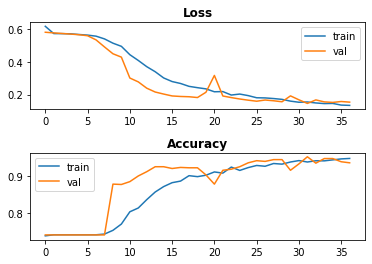



Confusion Matrix, without normalization


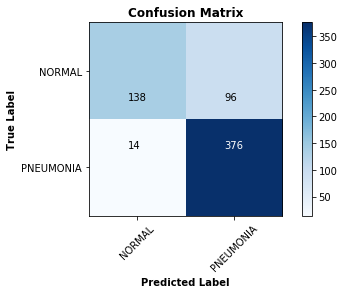



              precision    recall  f1-score   support

      NORMAL       0.91      0.59      0.72       234
   PNEUMONIA       0.80      0.96      0.87       390

    accuracy                           0.82       624
   macro avg       0.85      0.78      0.79       624
weighted avg       0.84      0.82      0.81       624



In [40]:
print(mf.evaluate_test(model_1_256_6_sing, history_1_256_6_sing, class_labels, train_images_256, test_images_256, train_y_256, test_y_256))

## Model 2 <a id='mod2'></a>

Next, we'll try Model 1 with double the filters.

* 6x6 and 5x5 layer
* 256x256 images
* Double filters
* Dropout before flatten
* Shift, Shear and Zoom on training set

We are unable to run this model without an OOM error on our current hardware.

In [24]:
model_2_256_6_doub = models.Sequential()
model_2_256_6_doub.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 1)))
model_2_256_6_doub.add(layers.MaxPooling2D((2, 2)))

model_2_256_6_doub.add(layers.Conv2D(64, (6, 6), activation='relu'))
model_2_256_6_doub.add(layers.MaxPooling2D((2, 2)))

model_2_256_6_doub.add(layers.Conv2D(128, (5, 5), activation='relu'))
model_2_256_6_doub.add(layers.MaxPooling2D((2, 2)))

model_2_256_6_doub.add(layers.Conv2D(256, (4, 4), activation='relu'))
model_2_256_6_doub.add(layers.MaxPooling2D((2, 2)))

model_2_256_6_doub.add(layers.Conv2D(256, (3, 3), activation='relu'))
model_2_256_6_doub.add(layers.MaxPooling2D((2, 2)))

model_2_256_6_doub.add(Dropout(.3))
model_2_256_6_doub.add(layers.Flatten())
model_2_256_6_doub.add(layers.Dense(64, activation='relu'))
model_2_256_6_doub.add(layers.Dense(1, activation='sigmoid'))

model_2_256_6_doub.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['acc'])

In [ ]:
%%time
early_stopping = [EarlyStopping(monitor = 'val_loss', patience = 10)]
history_2_256_6_doub = model_2_256_6_doub.fit(train_images_256,
                                                 train_y_256,
                                                 epochs=30,
                                                 batch_size=50,
                                                 validation_data=(val_images_256, val_y_256),
                                             callbacks=early_stopping)

## Model 3 <a id='mod3'></a>

Since we were unable to run Model 2, we will try the same parameters with smaller images.

* 6x6 and 5x5 layer
* 128x128 images
* Double filters
* Dropout before flatten
* Shift, Shear and Zoom on training set

In [14]:
model_3_128_6_doub = models.Sequential()
model_3_128_6_doub.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model_3_128_6_doub.add(layers.MaxPooling2D((2, 2)))

model_3_128_6_doub.add(layers.Conv2D(64, (6, 6), activation='relu'))
model_3_128_6_doub.add(layers.MaxPooling2D((2, 2)))

model_3_128_6_doub.add(layers.Conv2D(128, (5, 5), activation='relu'))
model_3_128_6_doub.add(layers.MaxPooling2D((2, 2)))

model_3_128_6_doub.add(layers.Conv2D(256, (4, 4), activation='relu'))
model_3_128_6_doub.add(layers.MaxPooling2D((2, 2)))

model_3_128_6_doub.add(layers.Conv2D(256, (3, 3), activation='relu'))
model_3_128_6_doub.add(layers.MaxPooling2D((2, 2)))

model_3_128_6_doub.add(Dropout(.3))
model_3_128_6_doub.add(layers.Flatten())
model_3_128_6_doub.add(layers.Dense(64, activation='relu'))
model_3_128_6_doub.add(layers.Dense(1, activation='sigmoid'))

model_3_128_6_doub.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['acc'])

In [15]:
%%time
early_stopping = [EarlyStopping(monitor = 'val_loss', patience = 5)]
history_3_128_6_doub = model_3_128_6_doub.fit(train_images_128,
                                                 train_y_128,
                                                 epochs=50,
                                                 batch_size=50,
                                                 validation_data=(val_images_128, val_y_128),
                                             callbacks=early_stopping)

Train on 4186 samples, validate on 1046 samples
Epoch 1/50
4186/4186 [==============================] - 8s 2ms/step - loss: 0.6073 - acc: 0.7367 - val_loss: 0.5748 - val_acc: 0.7419
Epoch 2/50
4186/4186 [==============================] - 7s 2ms/step - loss: 0.5680 - acc: 0.7422 - val_loss: 0.5695 - val_acc: 0.7419
Epoch 3/50
4186/4186 [==============================] - 7s 2ms/step - loss: 0.5646 - acc: 0.7422 - val_loss: 0.5652 - val_acc: 0.7419
Epoch 4/50
4186/4186 [==============================] - 7s 2ms/step - loss: 0.5618 - acc: 0.7422 - val_loss: 0.5586 - val_acc: 0.7419
Epoch 5/50
4186/4186 [==============================] - 7s 2ms/step - loss: 0.5550 - acc: 0.7422 - val_loss: 0.5489 - val_acc: 0.7419
Epoch 6/50
4186/4186 [==============================] - 7s 2ms/step - loss: 0.5422 - acc: 0.7422 - val_loss: 0.5291 - val_acc: 0.7419
Epoch 7/50
4186/4186 [==============================] - 7s 2ms/step - loss: 0.5306 - acc: 0.7461 - val_loss: 0.5019 - val_acc: 0.7419
Epoch 8/50
418

Accuracy 
 Train: 0.961, Test: 0.862
Loss 
 Train: 0.112, Test: 0.363 



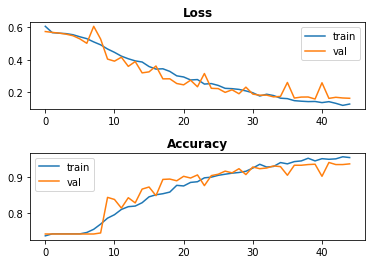



Confusion Matrix, without normalization


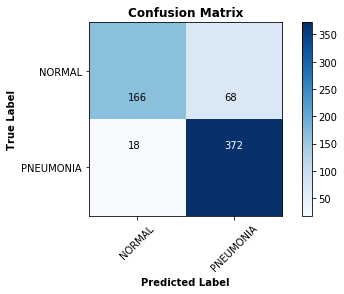



              precision    recall  f1-score   support

      NORMAL       0.90      0.71      0.79       234
   PNEUMONIA       0.85      0.95      0.90       390

    accuracy                           0.86       624
   macro avg       0.87      0.83      0.85       624
weighted avg       0.87      0.86      0.86       624



In [41]:
print(mf.evaluate_test(model_3_128_6_doub, history_3_128_6_doub, class_labels, train_images_128, test_images_128, train_y_128, test_y_128))

## Model 4 <a id='mod4'></a>

This model is the same as Model 3, with doubled filters. This is four times the baseline filters.

* 6x6 and 5x5 layer
* 128x128 images
* Quad filters
* Dropout before flatten
* Shift, Shear and Zoom on training set

In [17]:
model_4_128_6_quad = models.Sequential()
model_4_128_6_quad.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model_4_128_6_quad.add(layers.MaxPooling2D((2, 2)))

model_4_128_6_quad.add(layers.Conv2D(128, (6, 6), activation='relu'))
model_4_128_6_quad.add(layers.MaxPooling2D((2, 2)))

model_4_128_6_quad.add(layers.Conv2D(256, (5, 5), activation='relu'))
model_4_128_6_quad.add(layers.MaxPooling2D((2, 2)))

model_4_128_6_quad.add(layers.Conv2D(512, (4, 4), activation='relu'))
model_4_128_6_quad.add(layers.MaxPooling2D((2, 2)))

model_4_128_6_quad.add(layers.Conv2D(512, (3, 3), activation='relu'))
model_4_128_6_quad.add(layers.MaxPooling2D((2, 2)))

model_4_128_6_quad.add(Dropout(.3))
model_4_128_6_quad.add(layers.Flatten())
model_4_128_6_quad.add(layers.Dense(64, activation='relu'))
model_4_128_6_quad.add(layers.Dense(1, activation='sigmoid'))

model_4_128_6_quad.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['acc'])

In [18]:
%%time
early_stopping = [EarlyStopping(monitor = 'val_loss', patience = 5)]
history_4_128_6_quad = model_4_128_6_quad.fit(train_images_128,
                                                 train_y_128,
                                                 epochs=100,
                                                 batch_size=50,
                                                 validation_data=(val_images_128, val_y_128),
                                             callbacks=early_stopping)

Train on 4186 samples, validate on 1046 samples
Epoch 1/100
4186/4186 [==============================] - 18s 4ms/step - loss: 0.5957 - acc: 0.7422 - val_loss: 0.5750 - val_acc: 0.7419
Epoch 2/100
4186/4186 [==============================] - 16s 4ms/step - loss: 0.5689 - acc: 0.7422 - val_loss: 0.5727 - val_acc: 0.7419
Epoch 3/100
4186/4186 [==============================] - 16s 4ms/step - loss: 0.5677 - acc: 0.7422 - val_loss: 0.5694 - val_acc: 0.7419
Epoch 4/100
4186/4186 [==============================] - 16s 4ms/step - loss: 0.5641 - acc: 0.7422 - val_loss: 0.5648 - val_acc: 0.7419
Epoch 5/100
4186/4186 [==============================] - 16s 4ms/step - loss: 0.5594 - acc: 0.7422 - val_loss: 0.5663 - val_acc: 0.7419
Epoch 6/100
4186/4186 [==============================] - 16s 4ms/step - loss: 0.5508 - acc: 0.7427 - val_loss: 0.5581 - val_acc: 0.7419
Epoch 7/100
4186/4186 [==============================] - 16s 4ms/step - loss: 0.5427 - acc: 0.7430 - val_loss: 0.5237 - val_acc: 0.7419


Accuracy 
 Train: 0.938, Test: 0.872
Loss 
 Train: 0.158, Test: 0.321 



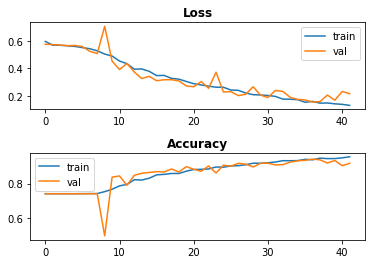



Confusion Matrix, without normalization


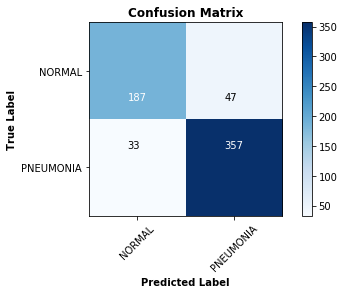



              precision    recall  f1-score   support

      NORMAL       0.85      0.80      0.82       234
   PNEUMONIA       0.88      0.92      0.90       390

    accuracy                           0.87       624
   macro avg       0.87      0.86      0.86       624
weighted avg       0.87      0.87      0.87       624



In [42]:
print(mf.evaluate_test(model_4_128_6_quad, history_4_128_6_quad, class_labels, train_images_128, test_images_128, train_y_128, test_y_128))

## Model 5

This model is the same as Model 4, with doubled filters. This is eight times the baseline filters.

* 6x6 and 5x5 layer
* 128x128 images
* Oct layers
* Dropout before flatten
* Shift, Shear and Zoom on training set

We are unable to run this model without an OOM error on our current hardware.

In [20]:
model_5_128_6_oct = models.Sequential()
model_5_128_6_oct.add(layers.Conv2D(256, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model_5_128_6_oct.add(layers.MaxPooling2D((2, 2)))

model_5_128_6_oct.add(layers.Conv2D(256, (6, 6), activation='relu'))
model_5_128_6_oct.add(layers.MaxPooling2D((2, 2)))

model_5_128_6_oct.add(layers.Conv2D(256, (5, 5), activation='relu'))
model_5_128_6_oct.add(layers.MaxPooling2D((2, 2)))

model_5_128_6_oct.add(layers.Conv2D(512, (4, 4), activation='relu'))
model_5_128_6_oct.add(layers.MaxPooling2D((2, 2)))

model_5_128_6_oct.add(layers.Conv2D(1024, (3, 3), activation='relu'))
model_5_128_6_oct.add(layers.MaxPooling2D((2, 2)))

model_5_128_6_oct.add(Dropout(.3))
model_5_128_6_oct.add(layers.Flatten())
model_5_128_6_oct.add(layers.Dense(64, activation='relu'))
model_5_128_6_oct.add(layers.Dense(1, activation='sigmoid'))

model_5_128_6_oct.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['acc'])

In [ ]:
%%time
early_stopping = [EarlyStopping(monitor = 'val_loss', patience = 5)]
history_5_128_6_oct = model_5_128_6_oct.fit(train_images_128,
                                                 train_y_128,
                                                 epochs=100,
                                                 batch_size=50,
                                                 validation_data=(val_images_128, val_y_128),
                                             callbacks=early_stopping)

## Model 6 <a id='mod6'></a>

Next, we'll see if we can double the filters and image size by reducing the number of layers.

* 5x5 layer
* 256x256 images
* Double filters
* Dropout before flatten
* Shift, Shear and Zoom on training set

This wasn't enough to allow us to run this model without an OOM error on our current hardware.

In [9]:
model_6_256_5_doub = models.Sequential()
model_6_256_5_doub.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 1)))
model_6_256_5_doub.add(layers.MaxPooling2D((2, 2)))

model_6_256_5_doub.add(layers.Conv2D(64, (5, 5), activation='relu'))
model_6_256_5_doub.add(layers.MaxPooling2D((2, 2)))

model_6_256_5_doub.add(layers.Conv2D(128, (4, 4), activation='relu'))
model_6_256_5_doub.add(layers.MaxPooling2D((2, 2)))

model_6_256_5_doub.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_6_256_5_doub.add(layers.MaxPooling2D((2, 2)))

model_6_256_5_doub.add(Dropout(.3))
model_6_256_5_doub.add(layers.Flatten())
model_6_256_5_doub.add(layers.Dense(64, activation='relu'))
model_6_256_5_doub.add(layers.Dense(1, activation='sigmoid'))

model_6_256_5_doub.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['acc'])

In [ ]:
%%time
early_stopping = [EarlyStopping(monitor = 'val_loss', patience = 5)]
history_6_256_5_doub = model_6_256_5_doub.fit(train_images_256,
                                                 train_y_256,
                                                 epochs=100,
                                                 batch_size=50,
                                                 validation_data=(val_images_256, val_y_256),
                                             callbacks=early_stopping)

## Model 7 <a id='mod7'></a>

Since we cannot run Model 6, we'll try the same parameters with smaller images. This is the same as Model 4, without the 6x6 layer.

* 5x5 layer
* 128x128 images
* Quad filters
* Dropout before flatten
* Shift, Shear and Zoom on training set

In [22]:
model_7_128_5_quad = models.Sequential()
model_7_128_5_quad.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model_7_128_5_quad.add(layers.MaxPooling2D((2, 2)))

model_7_128_5_quad.add(layers.Conv2D(128, (5, 5), activation='relu'))
model_7_128_5_quad.add(layers.MaxPooling2D((2, 2)))

model_7_128_5_quad.add(layers.Conv2D(256, (4, 4), activation='relu'))
model_7_128_5_quad.add(layers.MaxPooling2D((2, 2)))

model_7_128_5_quad.add(layers.Conv2D(256, (3, 3), activation='relu'))
model_7_128_5_quad.add(layers.MaxPooling2D((2, 2)))

model_7_128_5_quad.add(Dropout(.3))
model_7_128_5_quad.add(layers.Flatten())
model_7_128_5_quad.add(layers.Dense(64, activation='relu'))
model_7_128_5_quad.add(layers.Dense(1, activation='sigmoid'))

model_7_128_5_quad.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['acc'])

In [24]:
%%time
early_stopping = [EarlyStopping(monitor = 'val_loss', patience = 5)]
history_7_128_5_quad = model_7_128_5_quad.fit(train_images_128,
                                                 train_y_128,
                                                 epochs=100,
                                                 batch_size=50,
                                                 validation_data=(val_images_128, val_y_128),
                                             callbacks=early_stopping)

Train on 4186 samples, validate on 1046 samples
Epoch 1/100
4186/4186 [==============================] - 16s 4ms/step - loss: 0.5886 - acc: 0.7410 - val_loss: 0.5761 - val_acc: 0.7419
Epoch 2/100
4186/4186 [==============================] - 14s 3ms/step - loss: 0.5673 - acc: 0.7422 - val_loss: 0.5675 - val_acc: 0.7419
Epoch 3/100
4186/4186 [==============================] - 14s 3ms/step - loss: 0.5623 - acc: 0.7422 - val_loss: 0.5570 - val_acc: 0.7419
Epoch 4/100
4186/4186 [==============================] - 14s 3ms/step - loss: 0.5492 - acc: 0.7422 - val_loss: 0.5365 - val_acc: 0.7419
Epoch 5/100
4186/4186 [==============================] - 14s 3ms/step - loss: 0.5386 - acc: 0.7434 - val_loss: 0.5098 - val_acc: 0.7419
Epoch 6/100
4186/4186 [==============================] - 14s 3ms/step - loss: 0.5205 - acc: 0.7506 - val_loss: 0.5402 - val_acc: 0.8222
Epoch 7/100
4186/4186 [==============================] - 14s 3ms/step - loss: 0.4983 - acc: 0.7726 - val_loss: 0.4601 - val_acc: 0.8499


Accuracy 
 Train: 0.932, Test: 0.793
Loss 
 Train: 0.175, Test: 0.630 



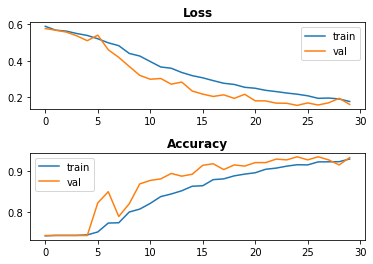



Confusion Matrix, without normalization


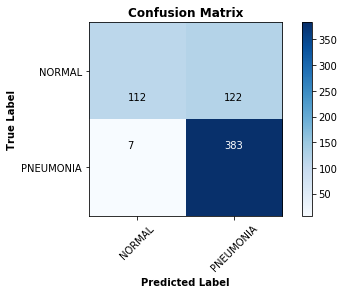



              precision    recall  f1-score   support

      NORMAL       0.94      0.48      0.63       234
   PNEUMONIA       0.76      0.98      0.86       390

    accuracy                           0.79       624
   macro avg       0.85      0.73      0.75       624
weighted avg       0.83      0.79      0.77       624



In [43]:
print(mf.evaluate_test(model_7_128_5_quad, history_7_128_5_quad, class_labels, train_images_128, test_images_128, train_y_128, test_y_128))

## Model 8 <a id='mod8'></a>

Our accuracy is much lower for Model 7, which only has a 5x5 layer. Here we add the 6x6 layer back and begin adding other parameters to the mix. This is the same as Model 4, our best model so far, with zoomed images for all sets.

* 6x6 and 5x5 layer
* 128x128 images
* Quad filters
* Dropout before flatten
* Shift and Shear on training set
* Zoom on all sets

In [30]:
model_8_128_6_quad_zoom = models.Sequential()
model_8_128_6_quad_zoom.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model_8_128_6_quad_zoom.add(layers.MaxPooling2D((2, 2)))

model_8_128_6_quad_zoom.add(layers.Conv2D(128, (6, 6), activation='relu'))
model_8_128_6_quad_zoom.add(layers.MaxPooling2D((2, 2)))

model_8_128_6_quad_zoom.add(layers.Conv2D(256, (5, 5), activation='relu'))
model_8_128_6_quad_zoom.add(layers.MaxPooling2D((2, 2)))

model_8_128_6_quad_zoom.add(layers.Conv2D(512, (4, 4), activation='relu'))
model_8_128_6_quad_zoom.add(layers.MaxPooling2D((2, 2)))

model_8_128_6_quad_zoom.add(layers.Conv2D(512, (3, 3), activation='relu'))
model_8_128_6_quad_zoom.add(layers.MaxPooling2D((2, 2)))

model_8_128_6_quad_zoom.add(Dropout(.3))
model_8_128_6_quad_zoom.add(layers.Flatten())
model_8_128_6_quad_zoom.add(layers.Dense(64, activation='relu'))
model_8_128_6_quad_zoom.add(layers.Dense(1, activation='sigmoid'))

model_8_128_6_quad_zoom.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['acc'])

In [31]:
%%time
early_stopping = [EarlyStopping(monitor = 'val_loss', patience = 5)]
history_8_128_6_quad_zoom = model_8_128_6_quad_zoom.fit(train_images_128_zoom,
                                                 train_y_128_zoom,
                                                 epochs=100,
                                                 batch_size=50,
                                                 validation_data=(val_images_128_zoom, val_y_128_zoom),
                                             callbacks=early_stopping)

Train on 4186 samples, validate on 1046 samples
Epoch 1/100
4186/4186 [==============================] - 17s 4ms/step - loss: 0.6026 - acc: 0.7401 - val_loss: 0.5745 - val_acc: 0.7419
Epoch 2/100
4186/4186 [==============================] - 16s 4ms/step - loss: 0.5691 - acc: 0.7422 - val_loss: 0.5728 - val_acc: 0.7419
Epoch 3/100
4186/4186 [==============================] - 16s 4ms/step - loss: 0.5659 - acc: 0.7422 - val_loss: 0.5673 - val_acc: 0.7419
Epoch 4/100
4186/4186 [==============================] - 15s 4ms/step - loss: 0.5638 - acc: 0.7422 - val_loss: 0.5640 - val_acc: 0.7419
Epoch 5/100
4186/4186 [==============================] - 16s 4ms/step - loss: 0.5599 - acc: 0.7422 - val_loss: 0.5637 - val_acc: 0.7419
Epoch 6/100
4186/4186 [==============================] - 16s 4ms/step - loss: 0.5508 - acc: 0.7422 - val_loss: 0.5404 - val_acc: 0.7419
Epoch 7/100
4186/4186 [==============================] - 16s 4ms/step - loss: 0.5385 - acc: 0.7434 - val_loss: 0.5189 - val_acc: 0.7419


Accuracy 
 Train: 0.970, Test: 0.776
Loss 
 Train: 0.093, Test: 0.745 



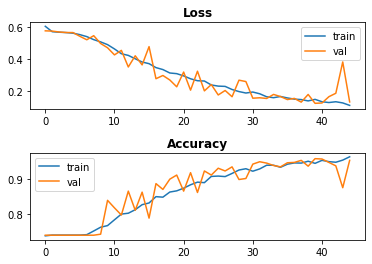



Confusion Matrix, without normalization


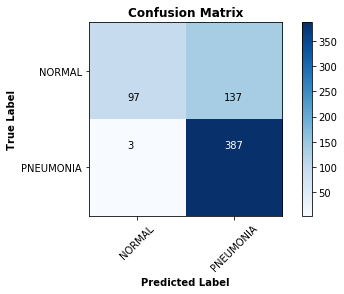



              precision    recall  f1-score   support

      NORMAL       0.97      0.41      0.58       234
   PNEUMONIA       0.74      0.99      0.85       390

    accuracy                           0.78       624
   macro avg       0.85      0.70      0.71       624
weighted avg       0.83      0.78      0.75       624



In [44]:
print(mf.evaluate_test(model_8_128_6_quad_zoom, history_8_128_6_quad_zoom, class_labels, train_images_128_zoom, test_images_128_zoom, train_y_128_zoom, test_y_128_zoom))

## Model 9 <a id='mod9'></a>

Now we'd like to try a model with more training, by increasing patience and adding a second dropout layer. All other parameters match Model 4, our best so far.

* 6x6 and 5x5 layer
* 128x128 images
* Quad filters
* Double Dropout
* Shift, Shear and Zoom on training set
* Increased patience (10)

In [33]:
model_9_128_6_quad_drop = models.Sequential()
model_9_128_6_quad_drop.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model_9_128_6_quad_drop.add(layers.MaxPooling2D((2, 2)))

model_9_128_6_quad_drop.add(layers.Conv2D(128, (6, 6), activation='relu'))
model_9_128_6_quad_drop.add(layers.MaxPooling2D((2, 2)))

model_9_128_6_quad_drop.add(layers.Conv2D(256, (5, 5), activation='relu'))
model_9_128_6_quad_drop.add(layers.MaxPooling2D((2, 2)))

model_9_128_6_quad_drop.add(layers.Conv2D(512, (4, 4), activation='relu'))
model_9_128_6_quad_drop.add(layers.MaxPooling2D((2, 2)))

model_9_128_6_quad_drop.add(layers.Conv2D(512, (3, 3), activation='relu'))
model_9_128_6_quad_drop.add(layers.MaxPooling2D((2, 2)))

model_9_128_6_quad_drop.add(Dropout(.3))
model_9_128_6_quad_drop.add(layers.Flatten())
model_9_128_6_quad_drop.add(layers.Dense(64, activation='relu'))
model_9_128_6_quad_drop.add(Dropout(.3))
model_9_128_6_quad_drop.add(layers.Dense(1, activation='sigmoid'))

model_9_128_6_quad_drop.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['acc'])

In [34]:
%%time
early_stopping = [EarlyStopping(monitor = 'val_loss', patience = 10)]
history_9_128_6_quad_drop = model_9_128_6_quad_drop.fit(train_images_128,
                                                 train_y_128,
                                                 epochs=100,
                                                 batch_size=50,
                                                 validation_data=(val_images_128, val_y_128),
                                             callbacks=early_stopping)

Train on 4186 samples, validate on 1046 samples
Epoch 1/100
4186/4186 [==============================] - 16s 4ms/step - loss: 0.6158 - acc: 0.7413 - val_loss: 0.5769 - val_acc: 0.7419
Epoch 2/100
4186/4186 [==============================] - 16s 4ms/step - loss: 0.5700 - acc: 0.7422 - val_loss: 0.5729 - val_acc: 0.7419
Epoch 3/100
4186/4186 [==============================] - 16s 4ms/step - loss: 0.5699 - acc: 0.7422 - val_loss: 0.5709 - val_acc: 0.7419
Epoch 4/100
4186/4186 [==============================] - 16s 4ms/step - loss: 0.5649 - acc: 0.7422 - val_loss: 0.5684 - val_acc: 0.7419
Epoch 5/100
4186/4186 [==============================] - 16s 4ms/step - loss: 0.5652 - acc: 0.7422 - val_loss: 0.5598 - val_acc: 0.7419
Epoch 6/100
4186/4186 [==============================] - 16s 4ms/step - loss: 0.5577 - acc: 0.7422 - val_loss: 0.5523 - val_acc: 0.7419
Epoch 7/100
4186/4186 [==============================] - 16s 4ms/step - loss: 0.5485 - acc: 0.7425 - val_loss: 0.5293 - val_acc: 0.7419


Accuracy 
 Train: 0.984, Test: 0.861
Loss 
 Train: 0.043, Test: 0.500 



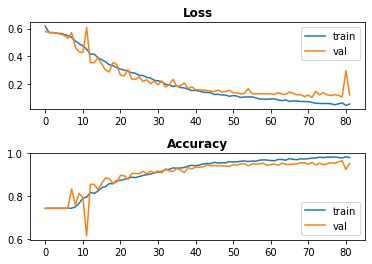



Confusion Matrix, without normalization


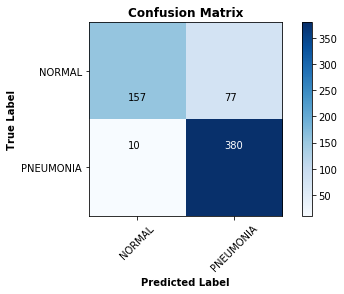



              precision    recall  f1-score   support

      NORMAL       0.94      0.67      0.78       234
   PNEUMONIA       0.83      0.97      0.90       390

    accuracy                           0.86       624
   macro avg       0.89      0.82      0.84       624
weighted avg       0.87      0.86      0.85       624



In [45]:
print(mf.evaluate_test(model_9_128_6_quad_drop, history_9_128_6_quad_drop, class_labels, train_images_128, test_images_128, train_y_128, test_y_128))

## Model 10 <a id='mod10'></a>

This model will be the same as Model 9, but with normal patience for early stopping.

* 6x6 and 5x5 layer
* 128x128 images
* Quad layers
* Double Dropout
* Shift, Shear and Zoom on training set

In [36]:
model_10_128_6_quad_drop = models.Sequential()
model_10_128_6_quad_drop.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model_10_128_6_quad_drop.add(layers.MaxPooling2D((2, 2)))

model_10_128_6_quad_drop.add(layers.Conv2D(128, (6, 6), activation='relu'))
model_10_128_6_quad_drop.add(layers.MaxPooling2D((2, 2)))

model_10_128_6_quad_drop.add(layers.Conv2D(256, (5, 5), activation='relu'))
model_10_128_6_quad_drop.add(layers.MaxPooling2D((2, 2)))

model_10_128_6_quad_drop.add(layers.Conv2D(512, (4, 4), activation='relu'))
model_10_128_6_quad_drop.add(layers.MaxPooling2D((2, 2)))

model_10_128_6_quad_drop.add(layers.Conv2D(512, (3, 3), activation='relu'))
model_10_128_6_quad_drop.add(layers.MaxPooling2D((2, 2)))

model_10_128_6_quad_drop.add(Dropout(.3))
model_10_128_6_quad_drop.add(layers.Flatten())
model_10_128_6_quad_drop.add(layers.Dense(64, activation='relu'))
model_10_128_6_quad_drop.add(Dropout(.3))
model_10_128_6_quad_drop.add(layers.Dense(1, activation='sigmoid'))

model_10_128_6_quad_drop.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['acc'])

In [37]:
%%time
early_stopping = [EarlyStopping(monitor = 'val_loss', patience = 5)]
history_10_128_6_quad_drop = model_10_128_6_quad_drop.fit(train_images_128,
                                                 train_y_128,
                                                 epochs=100,
                                                 batch_size=50,
                                                 validation_data=(val_images_128, val_y_128),
                                             callbacks=early_stopping)

Train on 4186 samples, validate on 1046 samples
Epoch 1/100
4186/4186 [==============================] - 16s 4ms/step - loss: 0.6106 - acc: 0.7348 - val_loss: 0.5777 - val_acc: 0.7419
Epoch 2/100
4186/4186 [==============================] - 16s 4ms/step - loss: 0.5724 - acc: 0.7422 - val_loss: 0.5718 - val_acc: 0.7419
Epoch 3/100
4186/4186 [==============================] - 16s 4ms/step - loss: 0.5703 - acc: 0.7422 - val_loss: 0.5703 - val_acc: 0.7419
Epoch 4/100
4186/4186 [==============================] - 16s 4ms/step - loss: 0.5666 - acc: 0.7422 - val_loss: 0.5669 - val_acc: 0.7419
Epoch 5/100
4186/4186 [==============================] - 16s 4ms/step - loss: 0.5658 - acc: 0.7422 - val_loss: 0.5591 - val_acc: 0.7419
Epoch 6/100
4186/4186 [==============================] - 16s 4ms/step - loss: 0.5546 - acc: 0.7422 - val_loss: 0.5475 - val_acc: 0.7419
Epoch 7/100
4186/4186 [==============================] - 16s 4ms/step - loss: 0.5479 - acc: 0.7422 - val_loss: 0.5486 - val_acc: 0.7419


Accuracy 
 Train: 0.980, Test: 0.861
Loss 
 Train: 0.053, Test: 0.581 



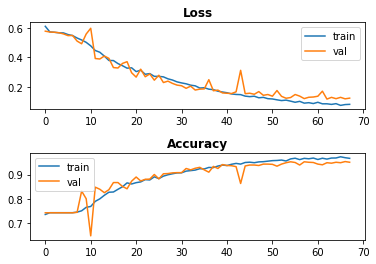



Confusion Matrix, without normalization


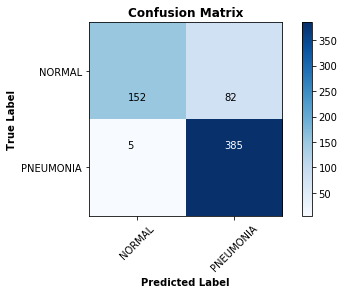



              precision    recall  f1-score   support

      NORMAL       0.97      0.65      0.78       234
   PNEUMONIA       0.82      0.99      0.90       390

    accuracy                           0.86       624
   macro avg       0.90      0.82      0.84       624
weighted avg       0.88      0.86      0.85       624



In [46]:
print(mf.evaluate_test(model_10_128_6_quad_drop, history_10_128_6_quad_drop, class_labels, train_images_128, test_images_128, train_y_128, test_y_128))